# 過去10年のデータの気象データを解析する
## 〜目的〜  
・データの集計や解析方法を学ぶ  
・機械学習を利用し明日の気温の予測を行う
## 〜データ〜
気象庁のデータを利用  
(https://www.data.jma.go.jp/gmd/risk/obsdl/index.php)  
・東京  
・日別値, 平均気温  
・2006/01/01 ~ 2016/12/31  


In [19]:
# csvファイルの読み込み
in_file = "csv/data.csv"
out_file = "csv/temperature_10_years.csv"

with open(in_file, "rt", encoding="Shift_JIS") as fr:
    lines = fr.readlines()

# ヘッダーを変更
header = "年,月,日,気温,品質,均質\n"
data_lines = lines[5:]

# データ行の修正
modified_data_lines = []
for line in data_lines:
    modified_line = line.replace("/", ",")
    modified_line = modified_line.strip()
    modified_data_lines.append(modified_line)

# 結果をファイルへ出力
with open(out_file, "wt", encoding="utf-8") as fw:
    fw.write(header)
    fw.write("\n".join(modified_data_lines))
    print("file saved.")

file saved.


### 気温の平均値を求める
10年分のデータを集計し, 各年ごと, 日別に平均気温を求める 
 
$平均値 = \frac{データの合計値}{データの数}$


In [22]:
import pandas as pd

df = pd.read_csv("csv/temperature_10_years.csv", encoding="utf-8")

# 日付ごとに気温をリストにまとめる
md = {}
for index, row in df.iterrows():
    month, day, temperature = (int(row['月']), int(row['日']), float(row['気温']))
    key = str(month) + "/" + str(day)
    if not key in md:
        md[key] = []
    md[key] += [temperature]

# 日付ごとに平均を求める
avs = {}
for key in md:
    average = avs[key] = sum(md[key]) / len(md[key])
    print("{0} : {1}".format(key, average))

1/1 : 6.0
1/2 : 6.545454545454546
1/3 : 6.145454545454546
1/4 : 6.1
1/5 : 6.4818181818181815
1/6 : 6.663636363636363
1/7 : 6.290909090909091
1/8 : 6.718181818181818
1/9 : 6.6000000000000005
1/10 : 6.0636363636363635
1/11 : 5.972727272727272
1/12 : 5.045454545454546
1/13 : 5.427272727272728
1/14 : 5.090909090909092
1/15 : 5.4363636363636365
1/16 : 5.654545454545454
1/17 : 5.627272727272726
1/18 : 5.045454545454546
1/19 : 6.0636363636363635
1/20 : 5.6909090909090905
1/21 : 5.6
1/22 : 5.5636363636363635
1/23 : 5.890909090909091
1/24 : 5.4818181818181815
1/25 : 6.0
1/26 : 6.027272727272727
1/27 : 6.363636363636363
1/28 : 6.5
1/29 : 6.281818181818181
1/30 : 6.763636363636365
1/31 : 6.754545454545453
2/1 : 6.309090909090909
2/2 : 6.663636363636363
2/3 : 6.363636363636363
2/4 : 5.800000000000001
2/5 : 5.790909090909091
2/6 : 5.318181818181818
2/7 : 6.1909090909090905
2/8 : 5.645454545454545
2/9 : 5.754545454545455
2/10 : 6.627272727272726
2/11 : 5.618181818181818
2/12 : 5.690909090909091
2/13

### 各月の平均気温を調べる

月
1      5.996481
2      6.598714
3     10.017009
4     14.481515
5     19.607918
6     22.544848
7     26.422287
8     27.887097
9     24.360303
10    19.155132
11    13.484545
12     8.653079
Name: 気温, dtype: float64


/var/folders/b2/7q3650n560ncf5xj980_g8y00000gn/T/ipykernel_64484/1924733787.py:12: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.savefig("images/weather-average-month.png")
/Users/inoueshohei/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


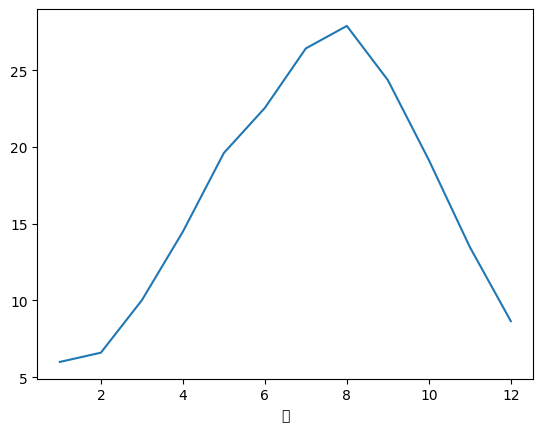

In [23]:
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv("csv/temperature_10_years.csv", encoding="utf-8")

g = df.groupby(['月'])['気温']
gg = g.sum() / g.count()

# 結果の出力
print(gg)
gg.plot()
plt.savefig("images/weather-average-month.png")
plt.show()

### 気温が30度を超える日を数える
Pandasを用いたフィルタリング

年
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 年, dtype: int64


/var/folders/b2/7q3650n560ncf5xj980_g8y00000gn/T/ipykernel_64484/1631382128.py:15: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.savefig("images/weather-over-thirty.png")
/Users/inoueshohei/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


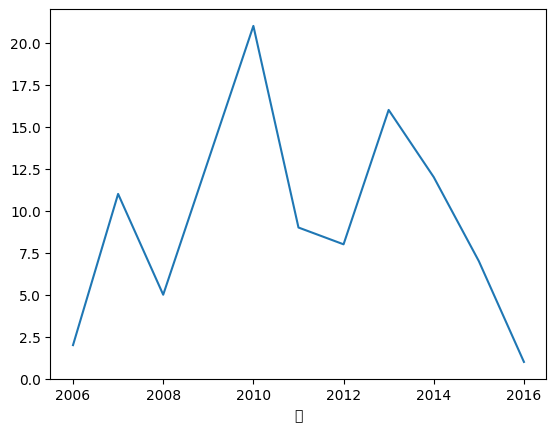

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("csv/temperature_10_years.csv", encoding="utf-8")

# 気温が30度を超えるデータを調べる
over_thirty_bool = (df["気温"] > 30)

over_thirty = df[over_thirty_bool]

count = over_thirty.groupby(["年"])["年"].count()

print(count)
count.plot()
plt.savefig("images/weather-over-thirty.png")
plt.show()

ブールインデックスを利用することで30度を超えるデータのみを抽出している

### 回帰分析で明日の気温を予測する
2015年以前のデータを学習用データ, 2016年のデータをテストデータとして利用  
6日間の過去データを入れると翌日の気温を予測するモデルを作る

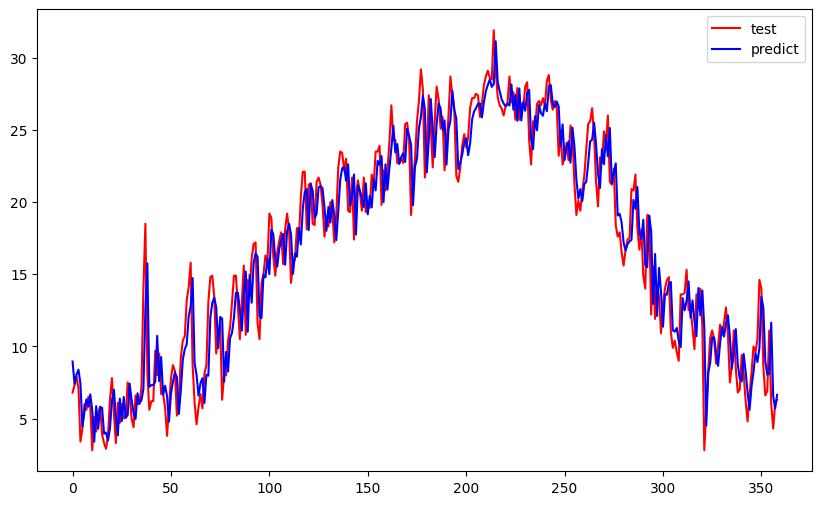

In [35]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("csv/temperature_10_years.csv", encoding="utf-8")

# データを学習用とテスト用に分割する
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6


# 過去6日分の学習データを作成
def make_data(data: pd.DataFrame):
    x = []
    y = []
    temps = list(data["気温"])
    for i in range(len(temps)):
        if i <= interval:
            continue

        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        
        x.append(xa)
    
    return (x, y)


train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 線形回帰分析を行う
lr = LinearRegression()
lr.fit(train_x, train_y)
predict_y = lr.predict(test_x)

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(predict_y, c='b')
plt.legend(["test", "predict"])
plt.savefig("images/weather-temperature-lr.png")
plt.show()

#### どの程度結果が合致しているかを評価する

In [32]:
predict_y - test_y

array([ 2.15210348,  0.10240126,  0.15126749,  1.28176013,  4.01349315,
        0.13649345, -0.56991947,  0.72590324, -0.68157904,  0.87231689,
        2.76057909, -1.70927099,  1.75723148, -1.11249865,  0.01171219,
        1.8376077 ,  0.65017731,  1.12572878, -0.32638642, -1.97879277,
       -1.57897461,  1.59915908,  1.72666952, -2.27184757,  1.68010553,
       -1.18558194,  1.49986304, -0.05137454, -2.25992962,  0.72204373,
        1.27927611,  0.98295116, -1.63035493,  0.74584714,  0.064542  ,
       -0.92913018, -6.94987315, -5.93967653,  7.65216231,  1.59523542,
        1.11482177,  1.11378395, -2.14832357,  2.72580384, -1.90756435,
        2.55761217, -0.06021142,  1.47197022,  2.7542319 , -1.01299601,
       -1.07168526, -1.15725466, -0.11044463,  2.66745047, -0.98697774,
       -2.27817187, -1.34526324, -0.89712028, -3.05883776, -2.00446103,
       -3.03642883,  6.03309307,  2.75235776,  3.4046313 ,  0.7836229 ,
        0.7570199 ,  2.09596658, -2.02033824, -0.65765503, -5.13

In [34]:
# 誤差の平均と誤差の最大を出力
different_y = abs(predict_y - test_y)
print("average=", sum(different_y) / len(different_y))
print("max=", max(different_y))

average= 1.6684265788476882
max= 8.471841447238656
